In [38]:
# https://graphviz.org/download/
# でインストールしたのち、C:\Program Files\Graphviz\binをPathに追加. 


# pip install torchviz
# https://qiita.com/daimyo404/items/cbed720c6ed90945246b

In [39]:
# インポート
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchviz import make_dot
from IPython.display import display

In [40]:
num_classes = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

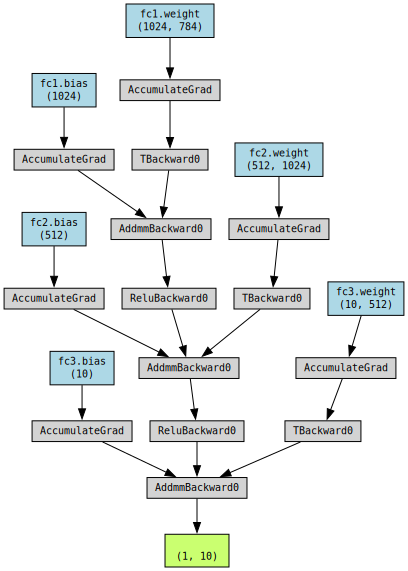

In [41]:
model = Net()

# 適当な入力
x = torch.randn(1, 28*28)
# 出力
y = model(x)

# 計算グラフを表示
img = make_dot(y, params=dict(model.named_parameters()))
display(img)

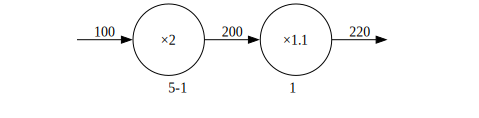

In [3]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(label = '図5-1 計算グラフによる問1の答え', rankdir='LR', labelloc='b', margin='0.2')            # 左から右へのレイアウトに設定
dot.attr('node', shape='circle', width='1.0', height='1.0', fixedsize='false')  # デフォルトノードを丸に設定

# ノード
dot.node('A', 'りんご', shape='plaintext')
dot.node('B', '×2')
dot.node('C', '×1.1')
dot.node('D', '代金', shape='plaintext')

# 数値ラベル付きエッジ
dot.edge('A', 'B', label='100')
dot.edge('B', 'C', label='200')
dot.edge('C', 'D', label='220')

dot


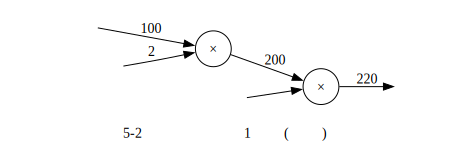

In [5]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(label = '図5-2 計算グラフによる問1の答え(変数版)', rankdir='LR', margin='0.1')  # 左から右へのレイアウト

# デフォルトで丸ノード（乗算ノード用）
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')

# プレーンテキストノード
dot.node('apple', 'りんご', shape='plaintext')
dot.node('apple_num', 'リンゴの個数', shape='plaintext')
dot.node('tax', '消費税', shape='plaintext')
dot.node('price', '代金', shape='plaintext')

# 乗算ノード
dot.node('mul1', '×')
dot.node('mul2', '×')

# エッジ
# りんご × リンゴの個数 → X
dot.edge('apple', 'mul1', label="100")
dot.edge('apple_num', 'mul1', label = "2")

# X × 消費税 → 代金
dot.edge('mul1', 'mul2', label="200")
dot.edge('tax', 'mul2')

# 代金
dot.edge('mul2', 'price', label="220")

# 表示
dot


In [44]:
# from graphviz import Digraph

# # 有向グラフを生成
# dot = Digraph(format='png')
# dot.attr(label = '図5-3 計算グラフによる問2の答え', rankdir='LR', margin='0.1')  # 左から右へのレイアウト

# # デフォルトで丸ノード（乗算ノード用）
# dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')

# # プレーンテキストノード
# dot.node('apple', 'りんご', shape='plaintext')
# dot.node('apple_num', 'りんごの個数', shape='plaintext')
# dot.node('orange', 'みかん', shape='plaintext')
# dot.node('orange_num', 'みかんの個数', shape='plaintext')
# dot.node('tax', '消費税', shape='plaintext')
# dot.node('price', '代金', shape='plaintext')

# # 乗算・加算ノード
# dot.node('mul_apple', '×')
# dot.node('mul_orange', '×')
# dot.node('add_apple_orange', '+')
# dot.node('mul_tax', '×')

# # エッジ
# # りんご
# dot.edge('apple', 'mul_apple', label="100")
# dot.edge('apple_num', 'mul_apple', label = "2")

# # みかん
# dot.edge('orange', 'mul_orange', label="150")
# dot.edge('orange_num', 'mul_orange', label = "3")

# # りんごとみかんの合計
# dot.edge('mul_apple', 'add_apple_orange', label="200")
# dot.edge('mul_orange', 'add_apple_orange', label = "450")

# # 消費税
# dot.edge('add_apple_orange', 'mul_tax', label="715")
# dot.edge('tax', 'mul_tax', label="1.1")

# # X × 消費税 → 代金
# dot.edge('mul_tax', 'price', label="715")

# # 表示
# dot


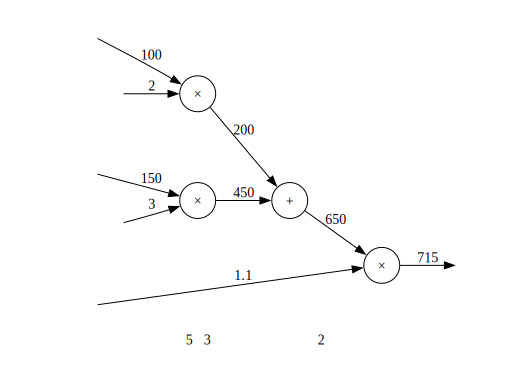

In [7]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(label='図5‑3  計算グラフによる問2の答え', rankdir='LR', margin='0.2')

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    s.node('orange', 'みかん', shape='plaintext')
    s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    s.edge('apple_num', 'orange', style='invis')
    s.edge('orange', 'orange_num', style='invis')
    s.edge('orange_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', '×')
dot.node('mul_orange', '×')
dot.node('add_apple_orange', '+')
dot.node('mul_tax', '×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('apple_num', 'mul_apple', label='2')

# みかん
dot.edge('orange', 'mul_orange', label='150')
dot.edge('orange_num', 'mul_orange', label='3')

# 合計
dot.edge('mul_apple', 'add_apple_orange', label='200')
dot.edge('mul_orange', 'add_apple_orange', label='450')

# 消費税
dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('tax', 'mul_tax', label='1.1')

# 代金
dot.edge('mul_tax', 'price', label='715')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


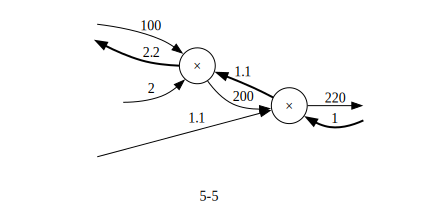

In [46]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(label = '図5-5 逆伝播による微分値の伝達', rankdir='LR', margin='0.1')  # 左から右へのレイアウト

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノード
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    
    s.edge('apple', 'apple_num', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# 乗算ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul1', '×')
dot.node('mul2', '×')

# りんご × リンゴの個数 → X
dot.edge('apple', 'mul1', label="100")
dot.edge('mul1', 'apple', label="2.2",  style = "bold")
dot.edge('apple_num', 'mul1', label = "2")

# X × 消費税 → 代金
dot.edge('mul1', 'mul2', label="200")
dot.edge('mul2', 'mul1', label="1.1", style = "bold")
dot.edge('tax', 'mul2', label="1.1")

# 代金
dot.node('price', '代金', shape='plaintext')
dot.edge('mul2', 'price', label="220")
dot.edge('price', 'mul2', label="1", style = "bold")

# 表示
dot

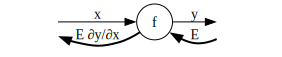

In [ ]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(label = '図5-6 計算グラフの逆伝播:順方向とは逆向きに、局所的な微分を乗算する.', rankdir='LR', margin='0.1')  # 左から右へのレイアウト

# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('func', 'f')

# 
dot.edge('x', 'func', label="x")
dot.edge('func', 'x', label='E ∂y/∂x', style = "bold")
dot.edge('func', 'y', label="y")
dot.edge('y', 'func', label="E", style = "bold")

# 表示
dot

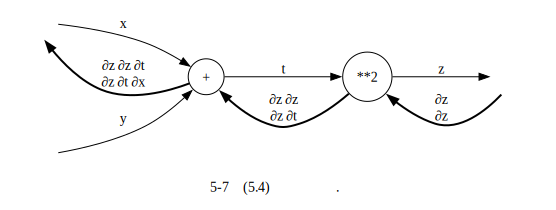

In [48]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-7 式(5.4)の計算グラフ.', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
dot.node('squ', '**2')

# 
dot.edge('x', 'add', label="x")
dot.edge('add', 'x', label='∂z ∂z ∂t\n∂z ∂t ∂x', style = "bold")
dot.edge('y', 'add', label="y")

dot.edge('add', 'squ', label="t")
dot.edge('squ', 'add', label="∂z ∂z \n∂z ∂t",  style = "bold")

dot.edge('squ', 'z', label="z")
dot.edge('z', 'squ', label='∂z\n∂z', style = "bold")

# 表示
dot

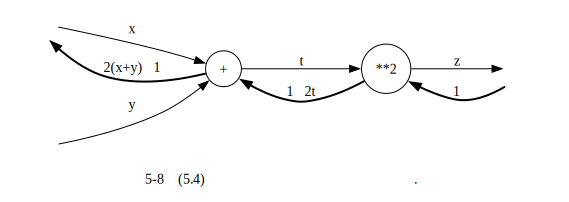

In [1]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-8 式(5.4)の計算グラフに、微分値を当てはめたもの.', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
dot.node('squ', '**2')

# 
dot.edge('x', 'add', label="x")
dot.edge('add', 'x', label='2(x+y)・1', style = "bold")
dot.edge('y', 'add', label="y")

dot.edge('add', 'squ', label="t")
dot.edge('squ', 'add', label='1・2t',  style = "bold")

dot.edge('squ', 'z', label="z")
dot.edge('z', 'squ', label='1', style = "bold")

# 表示
dot

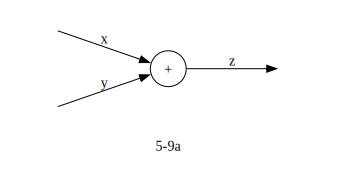

In [50]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-9a 加算ノードの順伝播', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
# dot.node('squ', '**2')

dot.edge('x', 'add', label="x")
dot.edge('y', 'add', label="y")
dot.edge('add', 'z', label="z")


# 表示
dot

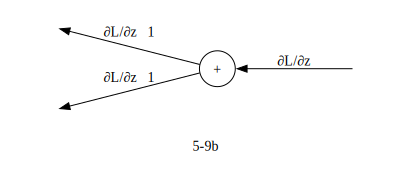

In [51]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-9b 加算ノードの逆伝播', 
    rankdir='RL',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
# dot.node('squ', '**2')

dot.edge('add', 'x', label="∂L/∂z・1")
dot.edge('add', 'y', label="∂L/∂z・1")
dot.edge( 'z', 'add',label="∂L/∂z")


# 表示
dot

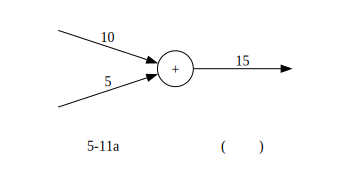

In [57]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-11a 加算ノードの順伝播(具体例)', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
# dot.node('squ', '**2')

dot.edge('x', 'add', label="10")
dot.edge('y', 'add', label="5")
dot.edge('add', 'z', label="15")


# 表示
dot

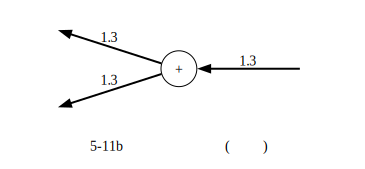

In [56]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-11b 加算ノードの順伝播(具体例)', 
    rankdir='RL',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('add', '+')
# dot.node('squ', '**2')

dot.edge('add', 'x', label="1.3", style='bold')
dot.edge('add', 'y', label="1.3", style='bold')
dot.edge( 'z', 'add',label="1.3", style='bold')


# 表示
dot

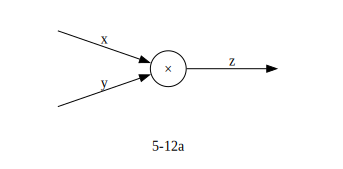

In [64]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-12a 乗算ノードの順伝播', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
# dot.node('squ', '**2')

dot.edge('x', 'mul', label="x")
dot.edge('y', 'mul', label="y")
dot.edge('mul', 'z', label="z")


# 表示
dot

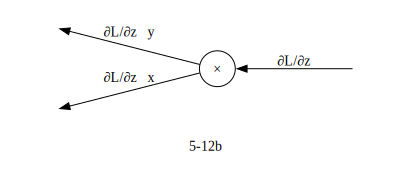

In [63]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-12b 乗算ノードの逆伝播', 
    rankdir='RL',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
# dot.node('squ', '**2')

dot.edge('mul', 'x', label="∂L/∂z・y")
dot.edge('mul', 'y', label="∂L/∂z・x")
dot.edge( 'z', 'mul',label="∂L/∂z")


# 表示
dot

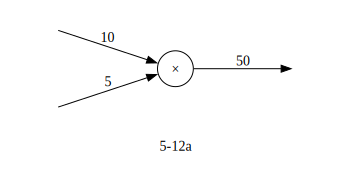

In [65]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-12a 乗算ノードの順伝播', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
# dot.node('squ', '**2')

dot.edge('x', 'mul', label="10")
dot.edge('y', 'mul', label="5")
dot.edge('mul', 'z', label="50")


# 表示
dot

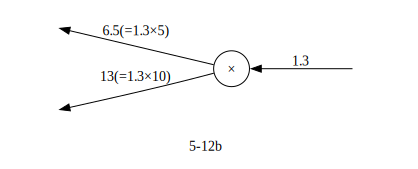

In [68]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-12b 乗算ノードの逆伝播', 
    rankdir='RL',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')
dot.node('z', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
# dot.node('squ', '**2')

dot.edge('mul', 'x', label="6.5(=1.3×5)")
dot.edge('mul', 'y', label="13(=1.3×10)")
dot.edge( 'z', 'mul',label="1.3")


# 表示
dot

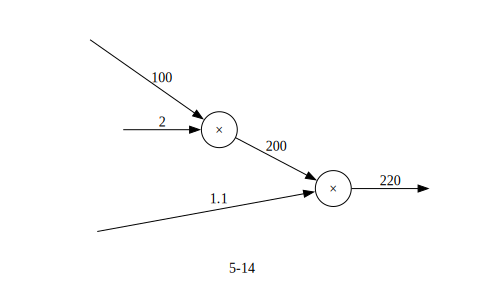

In [86]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-14 リンゴの買い物の逆伝播の例', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    # s.node('orange', 'みかん', shape='plaintext')
    # s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    # s.edge('apple_num', 'orange', style='invis')
    # s.edge('orange', 'orange_num', style='invis')
    # s.edge('orange_num', 'tax', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', '×')
# dot.node('mul_orange', '×')
# dot.node('add_apple_orange', '+')
dot.node('mul_tax', '×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('apple_num', 'mul_apple', label='2')

# # みかん
# dot.edge('orange', 'mul_orange', label='150')
# dot.edge('orange_num', 'mul_orange', label='3')

# 合計
dot.edge('mul_apple', 'mul_tax', label='200')
# dot.edge('mul_orange', 'add_apple_orange', label='450')

# 消費税
# dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('tax', 'mul_tax', label='1.1')

# 代金
dot.edge('mul_tax', 'price', label='220')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


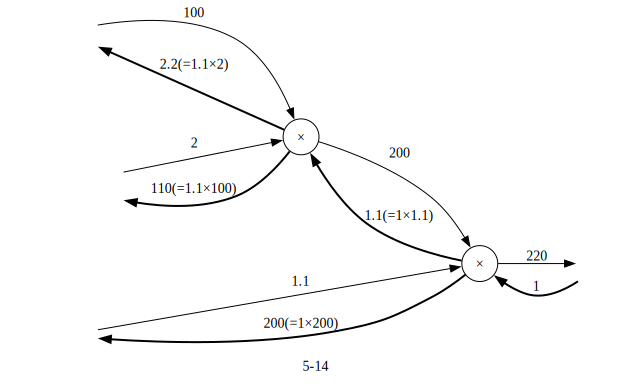

In [101]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-14 リンゴの買い物の逆伝播の例', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    # s.node('orange', 'みかん', shape='plaintext')
    # s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    # s.edge('apple_num', 'orange', style='invis')
    # s.edge('orange', 'orange_num', style='invis')
    # s.edge('orange_num', 'tax', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', '×')
# dot.node('mul_orange', '×')
# dot.node('add_apple_orange', '+')
dot.node('mul_tax', '×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# dot.attr(splines='polyline')       # 折れ線
# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('mul_apple','apple',  label='2.2(=1.1×2)', style='bold')
dot.edge('apple_num', 'mul_apple', label='2')
dot.edge('mul_apple', 'apple_num', label='110(=1.1×100)', style='bold')

# # みかん
# dot.edge('orange', 'mul_orange', label='150')
# dot.edge('orange_num', 'mul_orange', label='3')

# 合計
dot.edge('mul_apple', 'mul_tax', label='200')
dot.edge('mul_tax','mul_apple',  label='1.1(=1×1.1)', style='bold')
# dot.edge('mul_orange', 'add_apple_orange', label='450')

# 消費税
# dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('tax', 'mul_tax', label='1.1')
dot.edge('mul_tax', 'tax', label='200(=1×200)', style='bold')

# 代金
dot.edge('mul_tax', 'price', label='220')
dot.edge('price', 'mul_tax', label='1', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


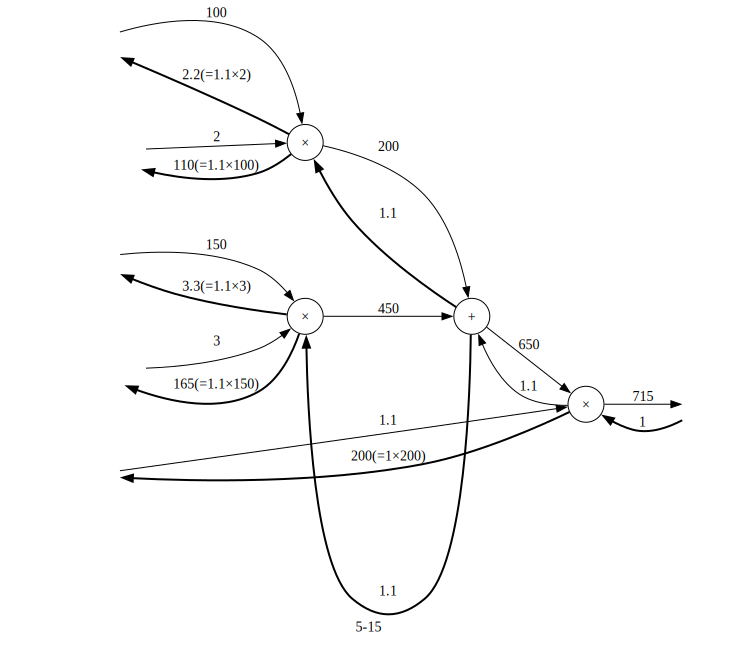

In [139]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-15 リンゴとみかんの買い物の逆伝播の例', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    s.node('orange', 'みかん', shape='plaintext')
    s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    s.edge('apple_num', 'orange', style='invis')
    s.edge('orange', 'orange_num', style='invis')
    s.edge('orange_num', 'tax', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', '×')
dot.node('mul_orange', '×')
dot.node('add_apple_orange', '+')
dot.node('mul_tax', '×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# dot.attr(splines='polyline')       # 折れ線

# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('mul_apple','apple',  label='2.2(=1.1×2)', style='bold')
dot.edge('apple_num', 'mul_apple', label='2')
dot.edge('mul_apple', 'apple_num', label='110(=1.1×100)', style='bold')

# みかん
dot.edge('orange', 'mul_orange', label='150')
dot.edge('mul_orange','orange',  label='3.3(=1.1×3)', style='bold')
dot.edge('orange_num', 'mul_orange', label='3')
dot.edge('mul_orange', 'orange_num', label='165(=1.1×150)', style='bold')

# 合計
# constraint = "false" とすると、描くけれど並び順は無視” となり、このエッジが左右スペースを奪わなくなる
dot.edge('mul_apple', 'add_apple_orange', label='200')
dot.edge('add_apple_orange', 'mul_apple', label='1.1', style='bold')
dot.edge('mul_orange', 'add_apple_orange', label='450')
dot.edge('add_apple_orange',      
         'mul_orange',           
         label='1.1', style='bold', constraint='false', weight='0') 

# 消費税
dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('mul_tax', 'add_apple_orange', label='1.1')

dot.edge('tax', 'mul_tax', label='1.1')
dot.edge('mul_tax', 'tax', label='200(=1×200)', style='bold')

# 代金
dot.edge('mul_tax', 'price', label='715')
dot.edge('price', 'mul_tax', label='1', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


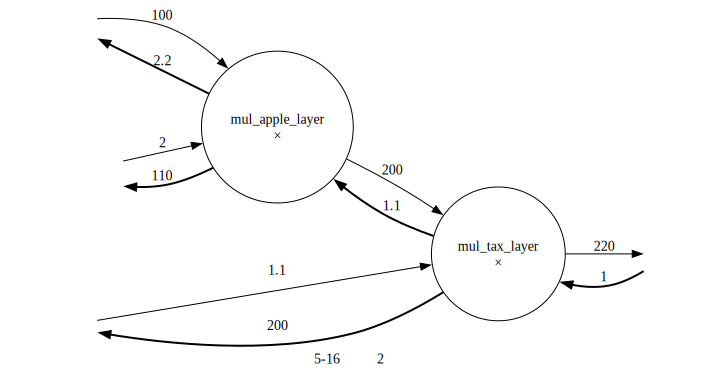

In [146]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-16 リンゴ2個の買い物', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    # s.node('orange', 'みかん', shape='plaintext')
    # s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    # s.edge('apple_num', 'orange', style='invis')
    # s.edge('orange', 'orange_num', style='invis')
    # s.edge('orange_num', 'tax', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', 'mul_apple_layer\n ×')
# dot.node('mul_orange', '×')
# dot.node('add_apple_orange', '+')
dot.node('mul_tax', 'mul_tax_layer\n ×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# dot.attr(splines='polyline')       # 折れ線
# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('mul_apple','apple',  label='2.2', style='bold')
dot.edge('apple_num', 'mul_apple', label='2')
dot.edge('mul_apple', 'apple_num', label='110', style='bold')

# # みかん
# dot.edge('orange', 'mul_orange', label='150')
# dot.edge('orange_num', 'mul_orange', label='3')

# 合計
dot.edge('mul_apple', 'mul_tax', label='200')
dot.edge('mul_tax','mul_apple',  label='1.1', style='bold')
# dot.edge('mul_orange', 'add_apple_orange', label='450')

# 消費税
# dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('tax', 'mul_tax', label='1.1')
dot.edge('mul_tax', 'tax', label='200', style='bold')

# 代金
dot.edge('mul_tax', 'price', label='220')
dot.edge('price', 'mul_tax', label='1', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


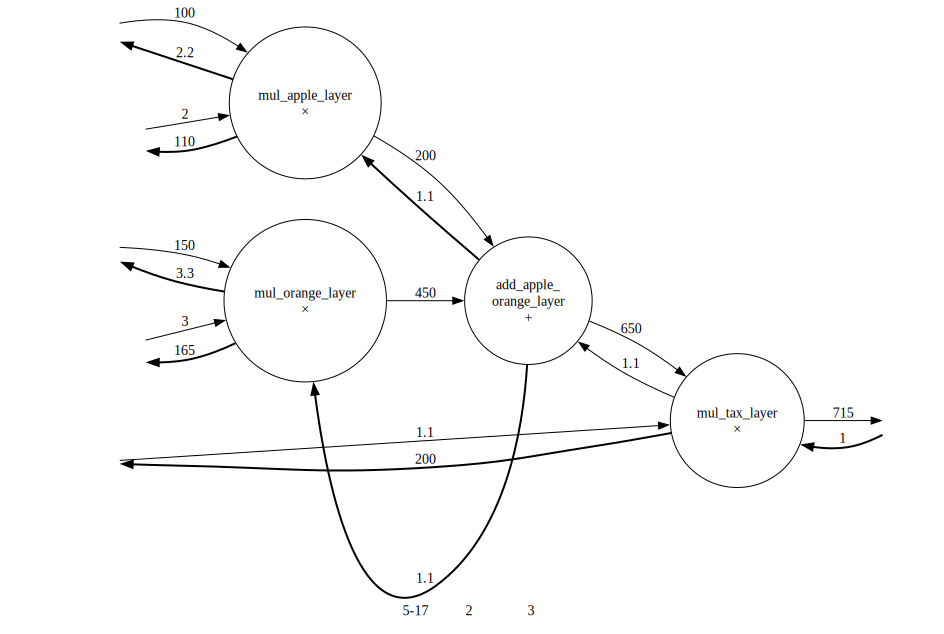

In [147]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-17 リンゴ2個とみかん3個の買い物', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('apple', 'りんご', shape='plaintext')
    s.node('apple_num', 'リンゴの個数', shape='plaintext')
    s.node('orange', 'みかん', shape='plaintext')
    s.node('orange_num', 'みかんの個数', shape='plaintext')
    s.node('tax', '消費税', shape='plaintext')
    # 見えないエッジで並び順を固定
    s.edge('apple', 'apple_num', style='invis')
    s.edge('apple_num', 'orange', style='invis')
    s.edge('orange', 'orange_num', style='invis')
    s.edge('orange_num', 'tax', style='invis')
    s.edge('apple_num', 'tax', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul_apple', 'mul_apple_layer\n ×')
dot.node('mul_orange', 'mul_orange_layer\n ×')
dot.node('add_apple_orange', 'add_apple_\n orange_layer\n+')
dot.node('mul_tax', 'mul_tax_layer\n ×')

# ------- 出力ノード --------
dot.node('price', '代金', shape='plaintext')

# ------- エッジ --------
# dot.attr(splines='polyline')       # 折れ線

# りんご
dot.edge('apple', 'mul_apple', label='100')
dot.edge('mul_apple','apple',  label='2.2', style='bold')
dot.edge('apple_num', 'mul_apple', label='2')
dot.edge('mul_apple', 'apple_num', label='110', style='bold')

# みかん
dot.edge('orange', 'mul_orange', label='150')
dot.edge('mul_orange','orange',  label='3.3', style='bold')
dot.edge('orange_num', 'mul_orange', label='3')
dot.edge('mul_orange', 'orange_num', label='165', style='bold')

# 合計
# constraint = "false" とすると、描くけれど並び順は無視” となり、このエッジが左右スペースを奪わなくなる
dot.edge('mul_apple', 'add_apple_orange', label='200')
dot.edge('add_apple_orange', 'mul_apple', label='1.1', style='bold')
dot.edge('mul_orange', 'add_apple_orange', label='450')
dot.edge('add_apple_orange',      
         'mul_orange',           
         label='1.1', style='bold', constraint='false', weight='0') 

# 消費税
dot.edge('add_apple_orange', 'mul_tax', label='650')
dot.edge('mul_tax', 'add_apple_orange', label='1.1')

dot.edge('tax', 'mul_tax', label='1.1')
dot.edge('mul_tax', 'tax', label='200', style='bold')

# 代金
dot.edge('mul_tax', 'price', label='715')
dot.edge('price', 'mul_tax', label='1', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


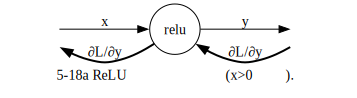

In [154]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-18a ReLUレイヤの計算グラフ(x>0のとき).', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('relu', 'relu')

# 
dot.edge('x', 'relu', label="x")
dot.edge('relu', 'x', label='∂L/∂y', style = "bold")
dot.edge('relu', 'y', label="y")
dot.edge('y', 'relu', label="∂L/∂y", style = "bold")

# 表示
dot

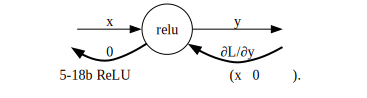

In [156]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-18b ReLUレイヤの計算グラフ(x≦0のとき).', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('relu', 'relu')

# 
dot.edge('x', 'relu', label="x")
dot.edge('relu', 'x', label='0', style = "bold")
dot.edge('relu', 'y', label="y")
dot.edge('y', 'relu', label="∂L/∂y", style = "bold")

# 表示
dot

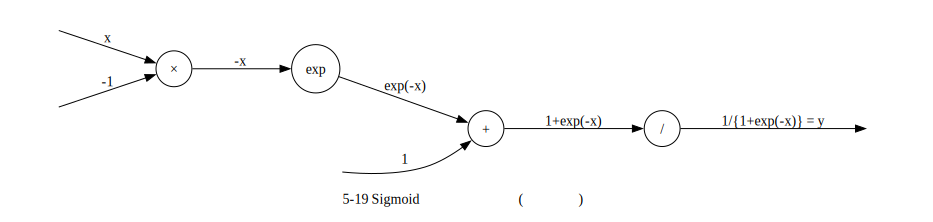

In [173]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-19 Sigmoidレイヤの計算グラフ(順伝播のみ)', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('in', ' ', shape='plaintext')
dot.node('-1', ' ', shape='plaintext')
dot.node('1', ' ', shape='plaintext')
dot.node('out', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
dot.node('exp', 'exp')
dot.node('add', '+')
dot.node('div', '/')

#　エッジ
dot.edge('in', 'mul', label="x")
dot.edge('-1', 'mul', label="-1")
dot.edge('mul', 'exp', label="-x")
dot.edge('exp', 'add', label="exp(-x)")
dot.edge('1', 'add', label="1")
dot.edge('add', 'div', label="1+exp(-x)")
dot.edge('div', 'out', label="1/{1+exp(-x)} = y")


# 表示
dot

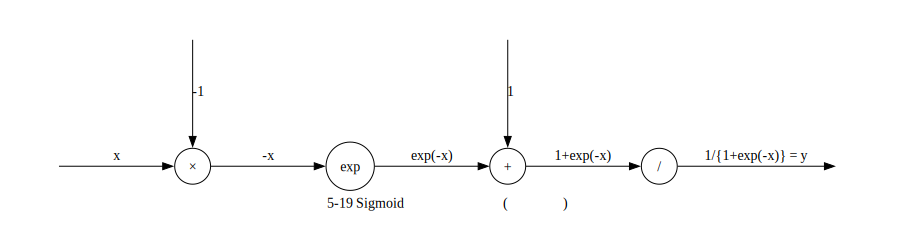

In [172]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-19 Sigmoidレイヤの計算グラフ(順伝播のみ)', 
    rankdir='TB',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('in', ' ', shape='plaintext')
dot.node('-1', ' ', shape='plaintext')
dot.node('1', ' ', shape='plaintext')
dot.node('out', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
dot.node('exp', 'exp')
dot.node('add', '+')
dot.node('div', '/')

# --- ① ここで「全ノード同ランク」サブグラフを作る ---
with dot.subgraph() as same:
    same.attr(rank='same')
    # 左から右へ並べたい順で列挙（順序指定を強めたいなら invis エッジを後述）
    for n in ['in',  'mul', 'exp', 'add', 'div', 'out',]:
        same.node(n)

    # # （任意）順序が崩れる場合は見えないエッジで固定
    # same.edge('in', '-1', style='invis')
    # same.edge('-1', 'mul', style='invis')
    # same.edge('mul', 'exp', style='invis')
    # same.edge('exp', 'add', style='invis')
    # same.edge('add', 'div', style='invis')
    # same.edge('div', 'out', style='invis')

#　エッジ
dot.edge('in', 'mul', label="x")
dot.edge('-1', 'mul', label="-1")
dot.edge('mul', 'exp', label="-x")
dot.edge('exp', 'add', label="exp(-x)")
dot.edge('1', 'add', label="1")
dot.edge('add', 'div', label="1+exp(-x)")
dot.edge('div', 'out', label="1/{1+exp(-x)} = y")


# 表示
dot

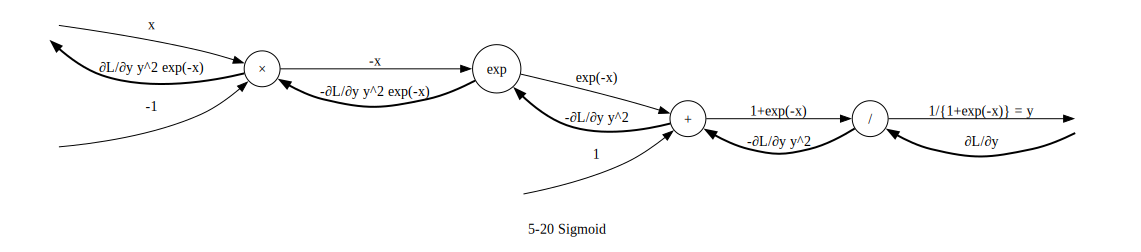

In [180]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-20 Sigmoidレイヤの計算グラフ', 
    rankdir='LR',    # 左から右へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('in', ' ', shape='plaintext')
dot.node('-1', ' ', shape='plaintext')
dot.node('1', ' ', shape='plaintext')
dot.node('out', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('mul', '×')
dot.node('exp', 'exp')
dot.node('add', '+')
dot.node('div', '/')

#　エッジ
dot.edge('in', 'mul', label="x")
dot.edge('mul', 'in', label="∂L/∂y y^2 exp(-x)", style='bold')
dot.edge('-1', 'mul', label="-1")

dot.edge('mul', 'exp', label="-x")
dot.edge('exp', 'mul', label="-∂L/∂y y^2 exp(-x)", style='bold')
dot.edge('exp', 'add', label="exp(-x)")
dot.edge('add', 'exp', label="-∂L/∂y y^2", style='bold')
dot.edge('1', 'add', label="1")

dot.edge('add', 'div', label="1+exp(-x)")
dot.edge('div', 'add', label="-∂L/∂y y^2", style='bold')
dot.edge('div', 'out', label="1/{1+exp(-x)} = y")
dot.edge('out', 'div', label="∂L/∂y", style='bold')


# 表示
dot

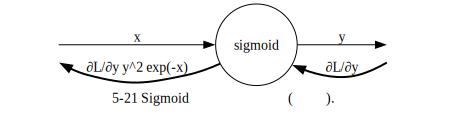

In [186]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-21 Sigmoidレイヤの計算グラフ(簡略版).', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('sigmoid', 'sigmoid')

# 
dot.edge('x', 'sigmoid', label="x")
dot.edge('sigmoid', 'x', label='∂L/∂y y^2 exp(-x)', style = "bold")
dot.edge('sigmoid', 'y', label="y")
dot.edge('y', 'sigmoid', label="∂L/∂y", style = "bold")

# 表示
dot

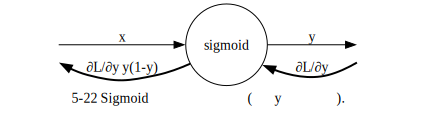

In [188]:
from graphviz import Digraph

# 有向グラフを生成
dot = Digraph(format='png')
dot.attr(
    label = '図5-22 Sigmoidレイヤの計算グラフ(出力yによる計算).', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.8'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)


# プレーンテキストノード
dot.node('x', ' ', shape='plaintext')
dot.node('y', ' ', shape='plaintext')

# ノード
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('sigmoid', 'sigmoid')

# 
dot.edge('x', 'sigmoid', label="x")
dot.edge('sigmoid', 'x', label='∂L/∂y y(1-y)', style = "bold")
dot.edge('sigmoid', 'y', label="y")
dot.edge('y', 'sigmoid', label="∂L/∂y", style = "bold")

# 表示
dot

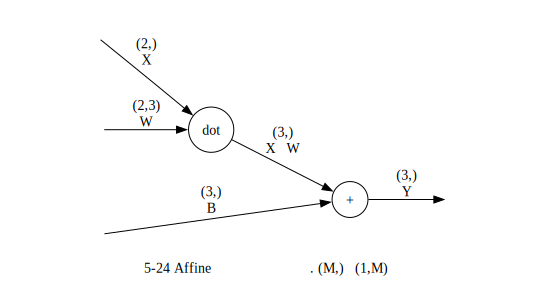

In [ ]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-24 Affineレイヤの計算グラフ. (M,)は(1,M)と考えると分かりやすい', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('X', ' ', shape='plaintext')
    s.node('W', ' ', shape='plaintext')
    s.node('B', ' ', shape='plaintext')

    # 見えないエッジで並び順を固定
    s.edge('X', 'W', style='invis')
    s.edge('W', 'B', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('dot', 'dot')
dot.node('add', '+')

# ------- 出力ノード --------
dot.node('Y', ' ', shape='plaintext')

# ------- エッジ --------
# X,W
dot.edge('X', 'dot', label='(2,)\nX')
dot.edge('W', 'dot', label='(2,3)\nW')
dot.edge('dot', 'add', label='(3,)\nX・W')

# +B(バイアス)
dot.edge('B', 'add', label='(3,)\nB')

# Y(出力)
dot.edge('add', 'Y', label='(3,)\nY')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


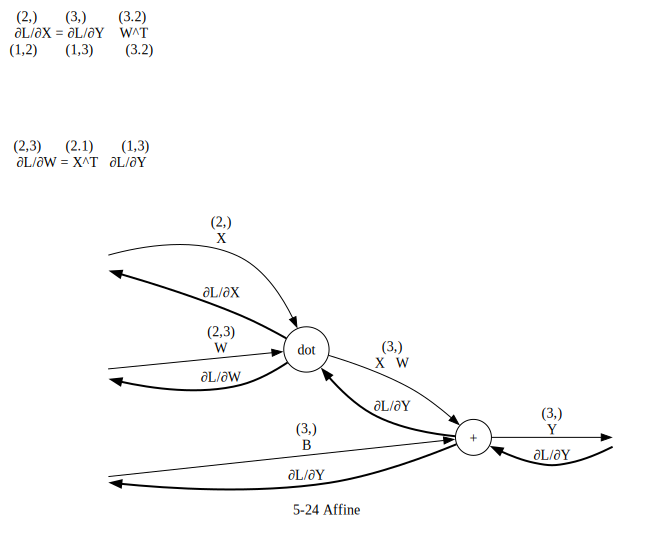

In [228]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-24 Affineレイヤの逆伝播', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('dummy1', '(2,)       (3,)        (3.2)\n∂L/∂X = ∂L/∂Y ・W^T\n (1,2)       (1,3)        (3.2)', shape='plaintext')
    s.node('dummy2', '(2,3)      (2.1)       (1,3)\n∂L/∂W = X^T・∂L/∂Y', shape='plaintext')
    s.node('X', ' ', shape='plaintext')
    s.node('W', ' ', shape='plaintext')
    s.node('B', ' ', shape='plaintext')

    # 見えないエッジで並び順を固定
    
    s.edge('dummy1', 'dummy2', style='invis')
    s.edge('dummy2', 'X', style='invis')
    s.edge('X', 'W', style='invis')
    s.edge('W', 'B', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('dot', 'dot')
dot.node('add', '+')

# ------- 出力ノード --------
dot.node('Y', ' ', shape='plaintext')

# ------- エッジ --------
# X,W
dot.edge('X', 'dot', label='(2,)\nX')
dot.edge('dot', 'X', label='∂L/∂X', style='bold')
dot.edge('W', 'dot', label='(2,3)\nW')
dot.edge('dot', 'W', label='∂L/∂W', style='bold')
dot.edge('dot', 'add', label='(3,)\nX・W')
dot.edge('add', 'dot', label='∂L/∂Y', style='bold')

# +B(バイアス)
dot.edge('B', 'add', label='(3,)\nB')
dot.edge('add', 'B', label='∂L/∂Y', style='bold')

# Y(出力)
dot.edge('add', 'Y', label='(3,)\nY')
dot.edge('Y', 'add', label='∂L/∂Y', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


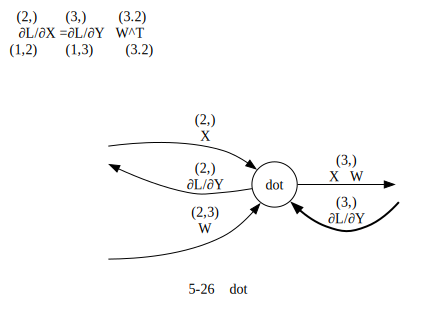

In [249]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-26 「dot」ノードの逆伝播', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='0.8',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('dummy1', '(2,)       (3,)        (3.2)\n∂L/∂X =∂L/∂Y・W^T \n (1,2)       (1,3)        (3.2)', shape='plaintext')
    s.node('X', ' ', shape='plaintext')
    s.node('W', ' ', shape='plaintext')

    # 見えないエッジで並び順を固定
    s.edge('dummy1', 'X', style='invis')
    s.edge('X', 'W', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('dot', 'dot')
dot.node('out', ' ', shape='plaintext')


# ------- エッジ --------
# X,W
dot.edge('X', 'dot', label='(2,)\nX')
dot.edge('dot', 'X', label='(2,)\n∂L/∂Y')
dot.edge('W', 'dot', label='(2,3)\nW')
dot.edge('dot', 'out', label='(3,)\nX・W')
dot.edge('out', 'dot', label='(3,)\n∂L/∂Y', style='bold')


# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


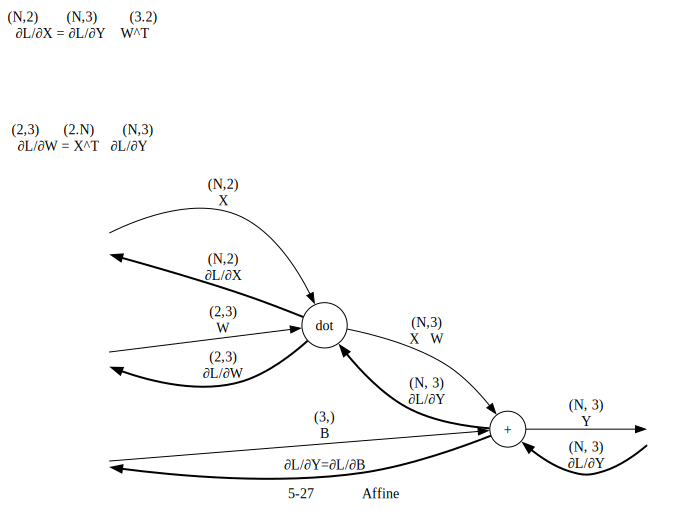

In [259]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-27 バッチ版Affineレイヤの計算グラフ', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('dummy1', '(N,2)       (N,3)        (3.2)\n∂L/∂X = ∂L/∂Y ・W^T', shape='plaintext')
    s.node('dummy2', '(2,3)      (2.N)       (N,3)\n∂L/∂W = X^T・∂L/∂Y', shape='plaintext')
    s.node('X', ' ', shape='plaintext')
    s.node('W', ' ', shape='plaintext')
    s.node('B', ' ', shape='plaintext')

    # 見えないエッジで並び順を固定
    
    s.edge('dummy1', 'dummy2', style='invis')
    s.edge('dummy2', 'X', style='invis')
    s.edge('X', 'W', style='invis')
    s.edge('W', 'B', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='circle', width='0.5', height='0.5', fixedsize='false')
dot.node('dot', 'dot')
dot.node('add', '+')

# ------- 出力ノード --------
dot.node('Y', ' ', shape='plaintext')

# ------- エッジ --------
# X,W
dot.edge('X', 'dot', label='(N,2)\nX')
dot.edge('dot', 'X', label='(N,2)\n∂L/∂X', style='bold')
dot.edge('W', 'dot', label='(2,3)\nW')
dot.edge('dot', 'W', label='(2,3)\n∂L/∂W', style='bold')
dot.edge('dot', 'add', label='(N,3)\nX・W')
dot.edge('add', 'dot', label='(N, 3)\n∂L/∂Y', style='bold')

# +B(バイアス)
dot.edge('B', 'add', label='(3,)\nB')
dot.edge('add', 'B', label='∂L/∂Y=∂L/∂B', style='bold')

# Y(出力)
dot.edge('add', 'Y', label='(N, 3)\nY')
dot.edge('Y', 'add', label='(N, 3)\n∂L/∂Y', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


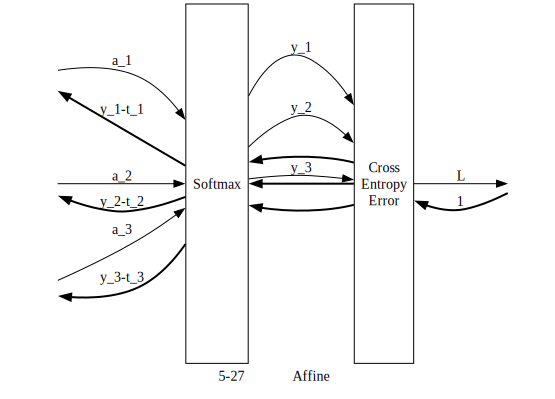

In [273]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label = '図5-27 バッチ版Affineレイヤの計算グラフ', 
    rankdir='LR',    # 右から左へのレイアウト
    margin='0.1',
    ranksep='1.2',   # ★ 列と列の間隔（既定 0.5inch → 1.2inch）
    nodesep='0.5'    # ★ 同じ列内のノード間隔（既定 0.25inch → 0.8inch）)
)

# ------- 左側に縦一列で並べたい入力ノード群 --------
with dot.subgraph() as s:
    s.attr(rank='same')  # 同じランクにして縦に配置（rankdir=LR なので縦方向）
    # プレーンテキストノードを追加（追加順＝上からの順）
    s.node('a1', ' ', shape='plaintext')
    s.node('a2', ' ', shape='plaintext')
    s.node('a3', ' ', shape='plaintext')

    # 見えないエッジで並び順を固定
    s.edge('a1', 'a2', style='invis')
    s.edge('a2', 'a3', style='invis')

# ------- 乗算・加算ノード --------
dot.attr('node', shape='box', width='0.5', height='5', fixedsize='false')
dot.node('softmax', 'Softmax')
dot.node('cee', 'Cross\nEntropy\nError')

# ------- 出力ノード --------
dot.node('Y', ' ', shape='plaintext')

# ------- エッジ --------
# softmax
dot.edge('a1', 'softmax', label='a_1')
dot.edge('softmax', 'a1', label='y_1-t_1', style='bold')
dot.edge('a2', 'softmax', label='a_2')
dot.edge('softmax', 'a2', label='y_2-t_2', style='bold')
dot.edge('a3', 'softmax', label='a_3')
dot.edge('softmax', 'a3', label='y_3-t_3', style='bold')


dot.edge('softmax', 'cee', label='y_1')
dot.edge('cee', 'softmax', label='', style='bold')
dot.edge('softmax', 'cee', label='y_2')
dot.edge('cee', 'softmax', label='', style='bold')
dot.edge('softmax', 'cee', label='y_3')
dot.edge('cee', 'softmax', label='', style='bold')


# Y(出力)
dot.edge('cee', 'Y', label='L')
dot.edge('Y', 'cee', label='1', style='bold')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))


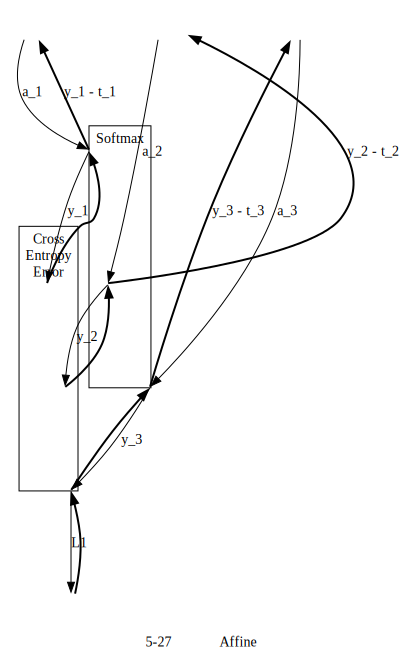

In [ ]:
from graphviz import Digraph
from IPython.display import SVG, display

# 有向グラフを生成
dot = Digraph(format='svg')
dot.attr(
    label='図5-27 バッチ版Affineレイヤの計算グラフ',
    rankdir='', margin='0.1',
    ranksep='1.2', nodesep='0.5'
)

# ------- 入力ノードを縦一列に -------
with dot.subgraph() as s:
    s.attr(rank='same')
    for n in ['a1', 'a2', 'a3']:
        s.node(n, ' ', shape='plaintext')
    s.edge('a1', 'a2', style='invis')
    s.edge('a2', 'a3', style='invis')

# ------- Softmax ボックス内の「疑似ノード」 -------
with dot.subgraph(name='cluster_softmax') as c:
    c.attr(label='Softmax', shape='box', rankdir='TB')
    for i in range(1, 4):
        name = f'sm{i}'
        c.node(name, '', shape='point', width='0.01', style='invis')
    c.edge('sm1', 'sm2', style='invis')
    c.edge('sm2', 'sm3', style='invis')

# ------- CrossEntropyError ボックス内の「疑似ノード」 -------
with dot.subgraph(name='cluster_cee') as c:
    c.attr(label='Cross\nEntropy\nError', shape='box', rankdir='TB')
    for i in range(1, 4):
        name = f'cee{i}'
        c.node(name, '', shape='point', width='0.01', style='invis')
    c.edge('cee1', 'cee2', style='invis')
    c.edge('cee2', 'cee3', style='invis')

# ------- 出力ノード -------
dot.node('Y', ' ', shape='plaintext')

# ------- エッジ（水平に流すためポート指定） -------
# Softmax への入力
dot.edge('a1', 'sm1', label='a_1')
dot.edge('a2', 'sm2', label='a_2')
dot.edge('a3', 'sm3', label='a_3')

# Softmax から戻り
dot.edge('sm1', 'a1', label='y_1 - t_1', style='bold',
          constraint='false')
dot.edge('sm2', 'a2', label='y_2 - t_2', style='bold',
          constraint='false')
dot.edge('sm3', 'a3', label='y_3 - t_3', style='bold',
          constraint='false')

# Softmax → CEE
dot.edge('sm1', 'cee1', label='y_1')
dot.edge('sm2', 'cee2', label='y_2')
dot.edge('sm3', 'cee3', label='y_3')

# CEE から戻り
dot.edge('cee1', 'sm1', label='', style='bold',
          constraint='false')
dot.edge('cee2', 'sm2', label='', style='bold',
          constraint='false')
dot.edge('cee3', 'sm3', label='', style='bold',
          constraint='false')

# CEE → Y
dot.edge('cee3', 'Y', label='L')
dot.edge('Y', 'cee3', label='1', style='bold',
          constraint='false')

# SVG として表示
svg_data = dot.pipe(format='svg')
display(SVG(svg_data))
